## Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

## Defining a st line function

In [29]:
def stline(x, m, c):
    return m * x + c

# Data set 1


Here the estimated slope is 2.791124245414918 ans estimated intercept value is 3.848800101430742


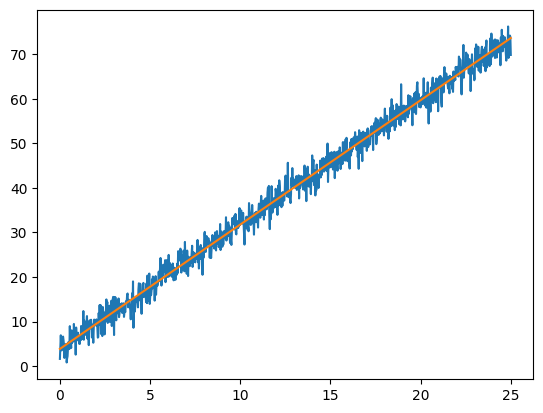

In [30]:
data=np.loadtxt("dataset1.txt")
x=data[:, 0]
y=data[:, 1]
plt.plot(x,y)
m=np.column_stack([x,np.ones(len(x))])
(p1, p2),_,_,_ = np.linalg.lstsq(m,y, rcond=None)
ans=stline(x,p1,p2)
plt.plot(x,ans)
print(f"Here the estimated slope is {p1} ans estimated intercept value is {p2}")

<ErrorbarContainer object of 3 artists>

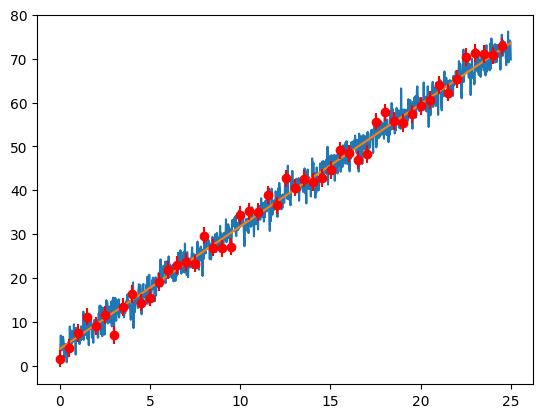

In [31]:
plt.plot(x,y)
plt.plot(x,ans)
plt.errorbar(x[::20], y[::20], np.std(y-ans), fmt='ro')

I use the **lstsq** function to plot this line.Because when i plot the noisy data given it almost resemble like a straight line  
We obtain size of error bars using standard deviation.

## Comparing lstsq function and curvefit function

The values of m and c according lstsq function are 2.791124245414918 and 3.848800101430742 respectively
The values of m and c according curvefit function are 2.7911242448201588 and 3.848800111263445 respectively
29.4 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
245 µs ± 6.79 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


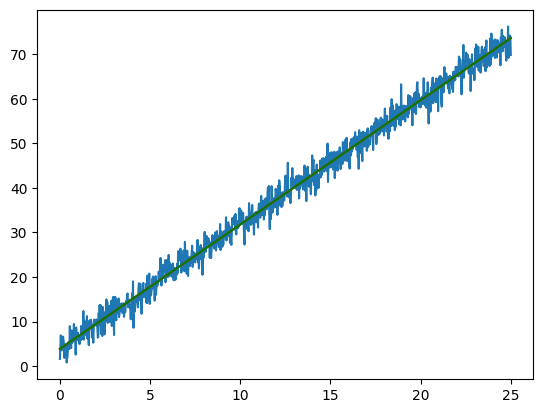

In [32]:
(p1, p2),_,_,_ = np.linalg.lstsq(m,y, rcond=None)
(q1,q2),cov=curve_fit(stline,x,y)
ans2=stline(x,q1,q2)
plt.plot(x,y)
plt.plot(x,ans,c='r')
plt.plot(x,ans2,c='g')

print(f"The values of m and c according lstsq function are {p1} and {p2} respectively")
print(f"The values of m and c according curvefit function are {q1} and {q2} respectively")

%timeit np.linalg.lstsq(m,y, rcond=None)
%timeit curve_fit(stline,x,y)

Here the values of m and c obtained from both the methods are almost same.  
The lines drawn using both the functions are almost similar,but the time taken to compute m and c is different.  
lstsq function takes less time than curvefit function.

# Data set 2

6.011120026320849 2.0014586398086704 0.9809069561926357 0.3999141220678749
Here amplitudes are a1:6.011120026320849,a2:2.0014586398086704,a3:0.9809069561926357 and fundamental frequency is 0.3999141220678749


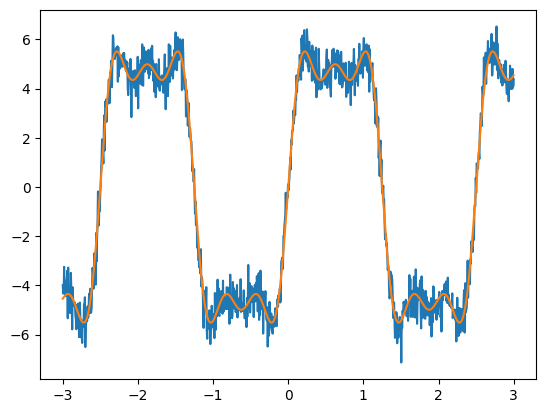

In [33]:
data=np.loadtxt("dataset2.txt")
x=data[:, 0]
y=data[:, 1]
plt.plot(x,y)

def f(t,a1,a2,a3,p1):
    return a1 * np.sin(2 * np.pi * p1 * t)+a2 * np.sin(2 * np.pi * 3*p1 * t)+a3 * np.sin(2 * np.pi *5*p1 * t)

(a1,a2,a3,p1),cov = curve_fit(f, x, y,p0=(1,1,1,0.3))  
print(a1,a2,a3,p1)
print(f"Here amplitudes are a1:{a1},a2:{a2},a3:{a3} and fundamental frequency is {p1}")
t=x
yans=f(x,a1,a2,a3,p1)
plt.plot(x,yans)

1. The first line loads a dataset from a file called "dataset2.txt" using the NumPy function loadtxt()  
2. The f() function defines a mathematical function that will be used to fit a curve to the data. This function takes four parameters: t, a1, a2, a3, and p1, and returns a linear combination of three sine functions with different frequencies and amplitudes.  
3. Here a1,a2,a3 are amplitudes of the three sin waves,and p1 is the fundamental frequency.  
4. The curve_fit() function from the scipy.optimize module is used to fit the f() function to the x and y data.  
5. The p0 argument specifies an initial guess for the parameters a1, a2, a3, and p1. 
6. The curve_fit() function returns two values: a tuple of the fitted parameter values (a1,a2,a3,p1), and a covariance matrix cov that estimates the uncertainty in the fitted parameters.  
7. The yans variable is created by evaluating the f() function with the fitted parameter values over the range of x values.  


<ErrorbarContainer object of 3 artists>

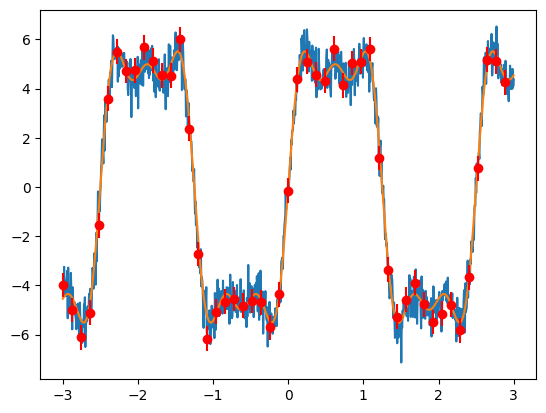

In [34]:
plt.plot(x,y)
plt.plot(x,yans)
plt.errorbar(x[::20], y[::20], np.std(y-yans), fmt='ro')

# Data set 3


The observations are taken at temperature 6011.3615235355355K and the estimated plancks constant is 6.643229761635281e-34


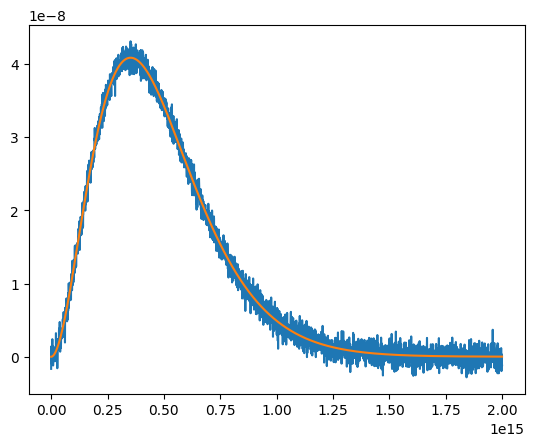

In [35]:
def planck_law(n, T, h):
    k = 1.38e-23
    c = 3.0e8
    return (2 * h * n**3) / (c**2 * (np.exp(h * n / (k * T)) - 1))


data=np.loadtxt("dataset3.txt")
n=data[:,0]
b=data[:,1]
plt.plot(n,b)
(temp,H),cov = curve_fit(planck_law, n, b,p0=[300, 6.62607015e-34])
yan=planck_law(n,temp,H)
plt.plot(n,yan)
print(f"The observations are taken at temperature {temp}K and the estimated plancks constant is {H}")

<ErrorbarContainer object of 3 artists>

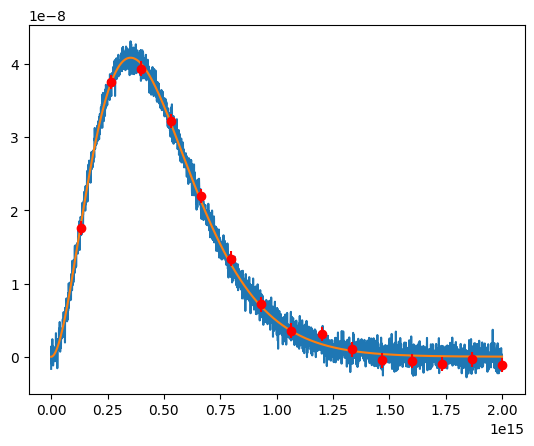

In [36]:
plt.plot(n,b)
plt.plot(n,yan)
plt.errorbar(n[::200], b[::200], np.std(b-yan), fmt='ro')

The Planck law is defined in the function planck_law(n, T, h) and takes three parameters as inputs the frequency n, the temperature T, and Planck's constant h.  The function calculates and returns the spectral radiance of a blackbody at temperature T using the Planck law.  The constants k and c are defined within the function and correspond to Boltzmann's constant and the speed of light, respectively.  
1. Load the data from the file "dataset3.txt" into the variable data using np.loadtxt.
2. Extract the frequency values n and the spectral radiance values b from the data variable. 
3. Call the curve_fit function from the scipy.optimize module, passing the planck_law function, n, and b as arguments. The p0 argument is set to [5000, 6.62607015e-34], which are the initial guesses for the temperature and Planck's constant.
4. Store the optimized values of temp and H in the variable temp and H, respectively, by unpacking the output of curve_fit  

Using curvefit is right approach here.Because the plancks equation is not linear equation,lstsq cannot be used here.

# Data set 4

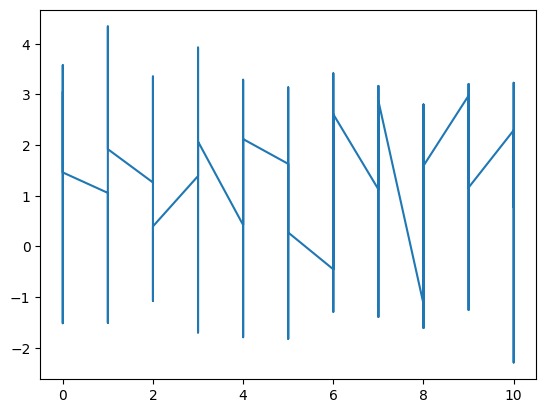

In [37]:
data=np.loadtxt("dataset4.txt")
x=data[:, 0]
y=data[:, 1]
plt.plot(x,y)

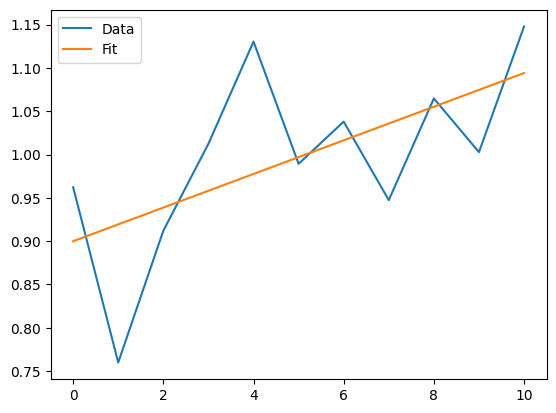

In [38]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def stline(x, m, c):
    return m * x + c

data = np.loadtxt("dataset4.txt")
x = data[:, 0]
y = data[:, 1]

y_groups = {}

for i in range(len(x)):
    if x[i] in y_groups:
        y_groups[x[i]].append(y[i])
    else:
        y_groups[x[i]] = [y[i]]

x_means = []
y_means = []
for x_val, y_vals in y_groups.items():
    x_means.append(x_val)
    y_means.append(np.mean(y_vals))

if not isinstance(x_means, np.ndarray):
    x_means = np.array(x_means)

    (q1, q2), cov = curve_fit(stline, x_means, y_means)

plt.plot(x_means, y_means, label='Data')
plt.plot(x_means, stline(x_means, q1, q2), label='Fit')
plt.legend()
plt.show()


The purpose of this code is to demonstrate how to perform interpolation and curve fitting in Python using NumPy and SciPy. The code takes a dataset containing 10 consecutive integer x values, and for each x value, there are multiple y values. The code then groups the y values by their corresponding x values and calculates the mean of the y values for each x value. Finally, the code performs linear regression on the mean y values using curve fitting to determine the best-fit line.    

